In [1]:
import os

In [37]:
import warnings
warnings.filterwarnings('ignore')
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from PIL import Image
import sys
import random
!pip install -q "tqdm>=4.36.1"
import tqdm

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import seaborn as sns

In [4]:
input_shape = (224,224,3)
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 512)      │             

 Total params: 6,301,549 (24.04 MB)

 Trainable params: 6,297,479 (24.02 MB)

 Non-trainable params: 4,070 (15.90 KB)

In [5]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [6]:
# datapath = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test', target_size=(224, 224), batch_size=1, shuffle=False, class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [7]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [8]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

In [20]:
checkpoint_filepath = '/kaggle/working/checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks_list = [model_checkpoint_callback]

In [22]:
train_steps = 80000//64
valid_steps = 5000//64

history = model.fit(
    train_flow,
    epochs =4,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 745s 593ms/step - accuracy: 0.6200 - loss: 0.8934 - val_accuracy: 0.7660 - val_loss: 0.4969
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.7915 - loss: 0.4535 - val_accuracy: 0.7790 - val_loss: 0.5253
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 332s 264ms/step - accuracy: 0.8347 - loss: 0.3765 - val_accuracy: 0.8954 - val_loss: 0.2545
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.9064 - loss: 0.2347 - val_accuracy: 0.8910 - val_loss: 0.2550


In [23]:
history = model.fit(
    train_flow,
    epochs =2,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 304s 242ms/step - accuracy: 0.9136 - loss: 0.2144 - val_accuracy: 0.9491 - val_loss: 0.1358
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9420 - loss: 0.1463 - val_accuracy: 0.8918 - val_loss: 0.2853


In [24]:
model.save("final-model-1.h5")

In [25]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 199s 10ms/step


Accuracy Score : 0.89435
Report : 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     10000
           1       0.98      0.80      0.88     10000

    accuracy                           0.89     20000
   macro avg       0.91      0.89      0.89     20000
weighted avg       0.91      0.89      0.89     20000



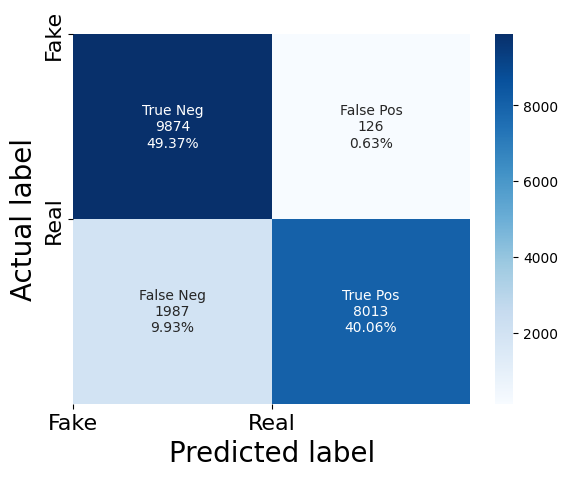

In [26]:
results = confusion_matrix(y_test, y_pred > 0.5) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap = 'Blues')
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
print('Accuracy Score :',accuracy_score(y_test, y_pred > 0.5))
print('Report : ')
print(classification_report(y_test, y_pred > 0.5))

In [27]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.98880685
AP Score: 0.9877111176443681


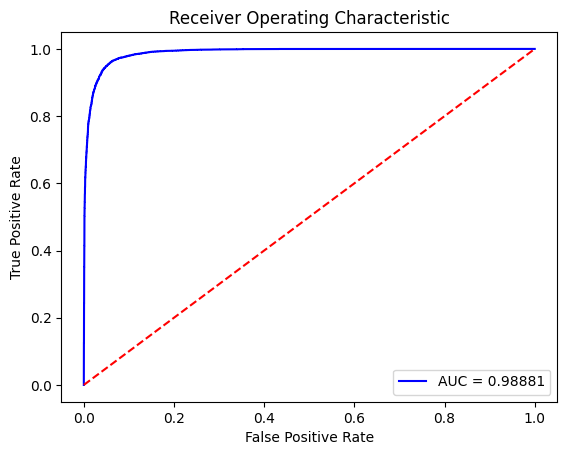

In [28]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, 'Predicted by the model as FAKE, actually is FAKE')

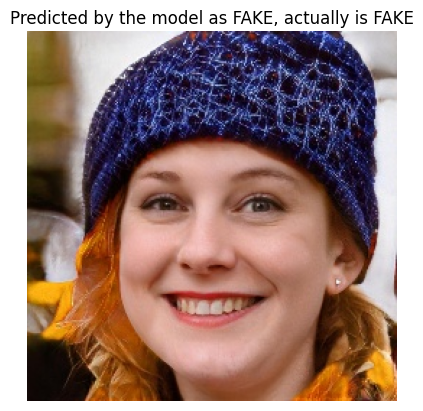

In [34]:
i = np.random.randint(20000)
datapath = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"  
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")

In [35]:
def predict_img_class():
    k = np.random.randint(20000)
    gridx = 4
    gridy = 4
    fig, ax = plt.subplots(gridx,gridy, figsize=(14,14))
    for j in range(gridx):
        for i in range(gridy):
            if test_flow.classes[k] == 0:
                actual = "FAKE"
            else:
                actual = "REAL"  
            if model.predict(test_flow[k][0])[0][0]<0.5:
                prediction = "FAKE"
            else:
                prediction = "REAL"
            datasetpath = test_flow.filenames[k]
            imgpath = datapath+'test/'+datasetpath
            img = load_img(imgpath)          
            ax[j,i].imshow(img)
            ax[j,i].set_title(f"Predicted: {prediction}, Actual: {actual}",size = 12)
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    fig.suptitle('Testing the prediction on Test images', size = 20)
    return plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

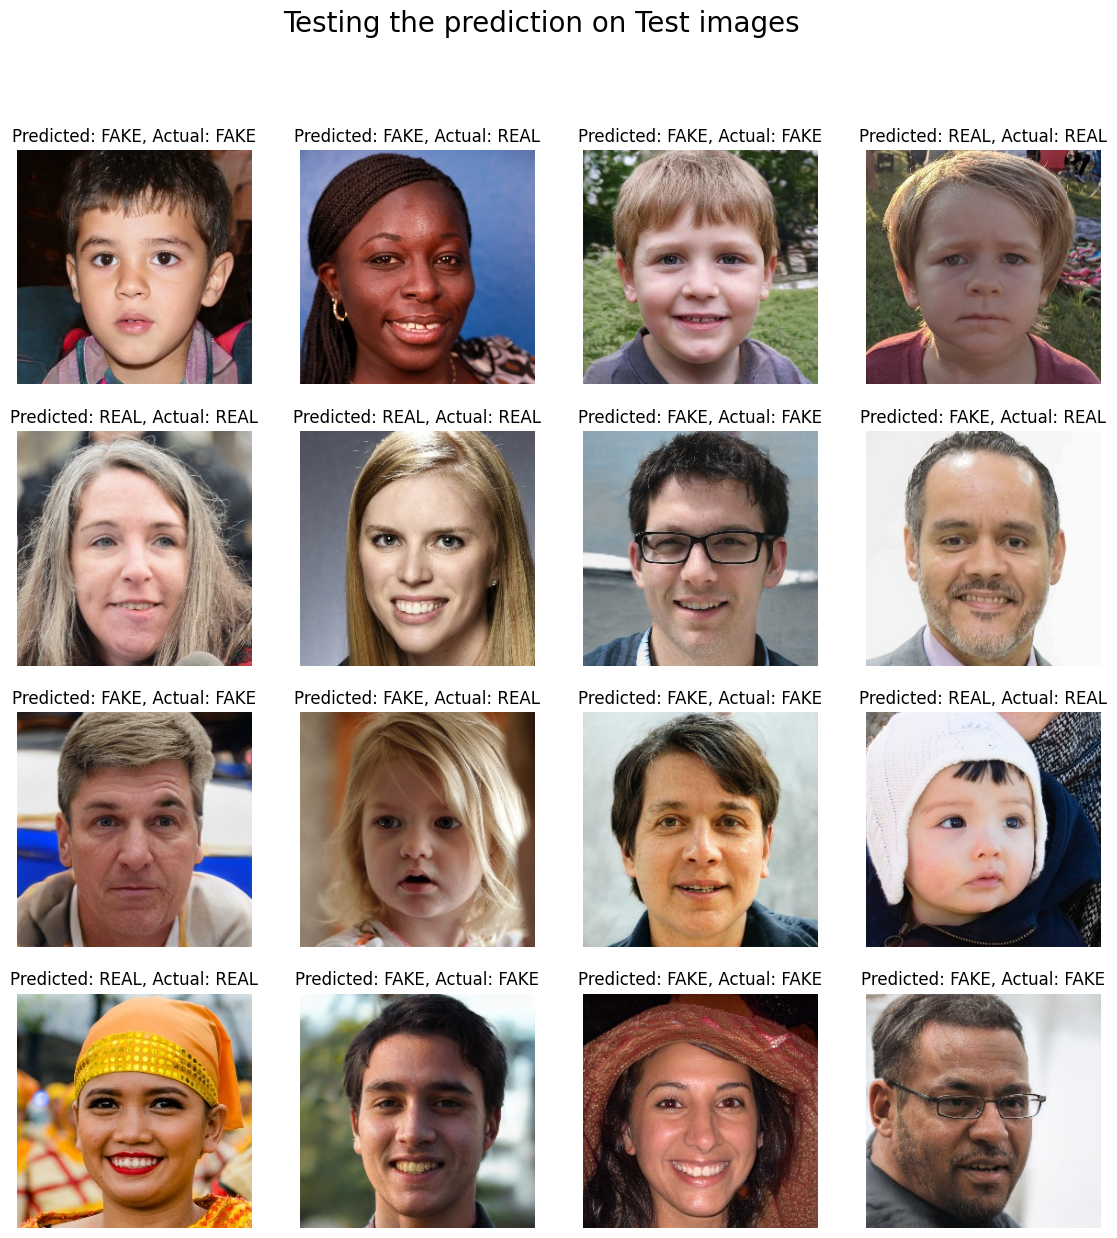

In [36]:
predict_img_class()